### Titanic Survival

In [2]:
# Import all necessary libraries/packages
import statsmodels.formula.api as smf
import seaborn as sns
import thinkplot
import thinkstats2
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import statistics as st
from matplotlib import pyplot as plt

# Import warnings and set filter warnings to ignore due to the use of deprecated code  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset (https://www.kaggle.com/c/titanic/data)
titanic_data = pd.read_csv("titanic.csv")

In [4]:
# Turn Survived into True boolean
titanic_data.Survived = [bool(passenger) for passenger in titanic_data.Survived]

titanic_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Children,Fare
0,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
1,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
2,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
3,True,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208
4,True,1,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292


In [5]:
# Show information about modified dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    bool   
 1   Pclass            887 non-null    int64  
 2   Name              887 non-null    object 
 3   Sex               887 non-null    object 
 4   Age               887 non-null    float64
 5   Siblings_Spouses  887 non-null    int64  
 6   Parents_Children  887 non-null    int64  
 7   Fare              887 non-null    float64
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 49.5+ KB


In [6]:
# Look for missing values
titanic_data.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
Siblings_Spouses    0
Parents_Children    0
Fare                0
dtype: int64

In [7]:
# Describe dataset
titanic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pclass,887.0,2.305524,0.836662,1.00,2.000,3.0000,3.0000,3.0000
Age,887.0,29.471443,14.121908,0.42,20.250,28.0000,38.0000,80.0000
Siblings_Spouses,887.0,0.525366,1.104669,0.00,0.000,0.0000,1.0000,8.0000
Parents_Children,887.0,0.383315,0.807466,0.00,0.000,0.0000,0.0000,6.0000
Fare,887.0,32.305420,49.782040,0.00,7.925,14.4542,31.1375,512.3292


In [8]:
# Break out survivors in separate dataframe
survivors = titanic_data[titanic_data['Survived'] == 1]
survivors.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Children,Fare
0,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
1,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
2,True,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500
3,True,1,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208
4,True,1,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292


In [9]:
# Break out casualities in separate dataframe
casualties = titanic_data[titanic_data['Survived'] == 0]
casualties.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses,Parents_Children,Fare
10,False,1,Miss. Ann Elizabeth Isham,female,50.0,0,0,28.7125
24,False,1,Miss. Helen Loraine Allison,female,2.0,1,2,151.5500
50,False,1,Mrs. Hudson J C (Bessie Waldo Daniels) Allison,female,25.0,1,2,151.5500
96,False,2,Mrs. William John Robert (Dorothy Ann Wonnacot...,female,27.0,1,0,21.0000
108,False,2,Miss. Henriette Yrois,female,24.0,0,0,13.0000


In [ ]:
# 5 Variables Used During the Analysis:
# Survived: This is a Boolean variable indicating whether a person survived (1) or not (0). 
# Pclass: This is a variable indicating the passenger class (1, 2, 3). 
# Sex: This is a string variable indicating the passenger’s sex (male, female). 
# Age: This is a numeric variable indicating the passenger’s age. 
# Fare: This is a currency variable indicating the price the passenger paid for their fare. 
# (Note: It seems that the fare listed is for all family members.)

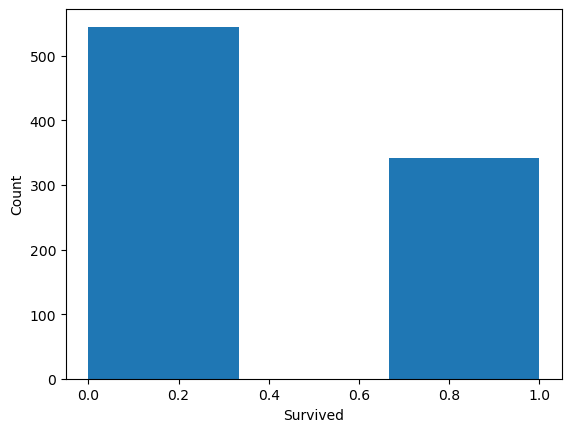

In [34]:
# 1st histogram for Variable "Survived"

# Get the Survived column
Survived = titanic_data["Survived"]

# Plot the histogram
plt.hist(Survived, bins=3)
plt.xlabel("Survived")
plt.ylabel("Count")

# Show the plot
plt.show()

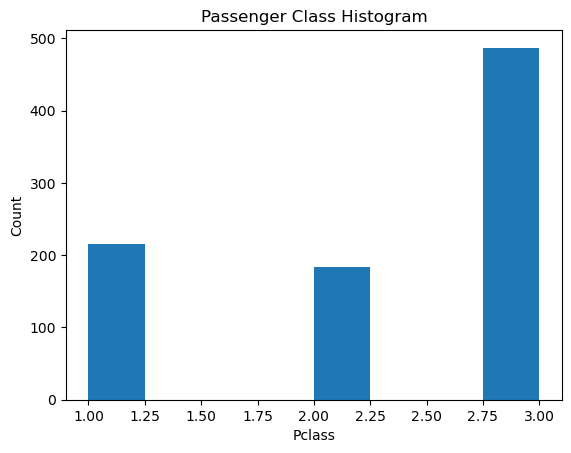

In [35]:
# 2nd histogram for Variable "Pclass"

# Get the Pclass column
pclass = titanic_data["Pclass"]

# Plot the histogram
plt.hist(Pclass, bins=8)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title('Passenger Class Histogram')

# Show the plot
plt.show()

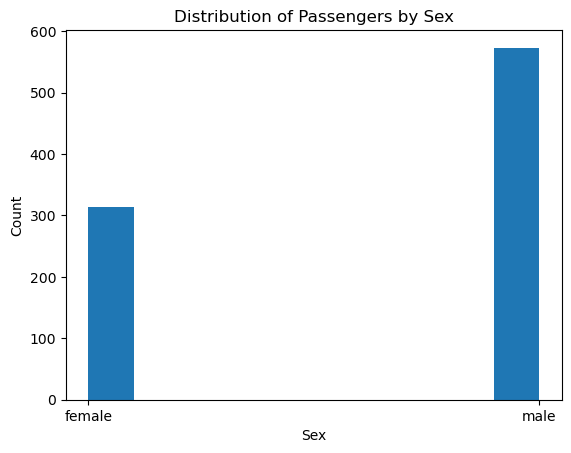

In [36]:
# 3rd histogram for Variable "Sex"

# Specify the column name for the variable I want to create a histogram for
column_name = 'Sex'

# Plot the histogram
plt.hist(titanic_data[column_name])

# Add a title and labels for the x and y axes
plt.title('Distribution of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

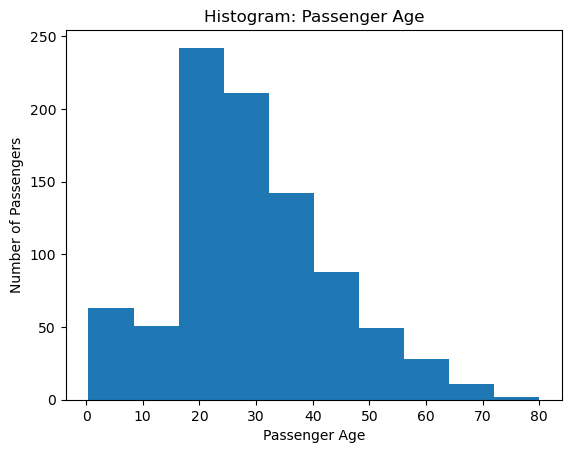

Mean: 29.471443066516347
Mode: 22.0
Spread: 14.113945671023167
Tails: 17.75


In [38]:
# 4th histogram for Variable "Age"

# Plot the histogram
plt.hist(titanic_data.Age, bins=10)

# Add a title and labels for the x and y axes
plt.title('Histogram: Passenger Age')
plt.xlabel('Passenger Age')
plt.ylabel('Number of Passengers')
plt.show()

# Print the values for Mean, Mode and Spread
print('Mean:', np.mean(titanic_data.Age))
print('Mode:', st.mode(titanic_data.Age))
print('Spread:', np.std(titanic_data.Age))

# Print the value for Tails
p25 = np.percentile(titanic_data.Age, 25)
p75 = np.percentile(titanic_data.Age, 75)
iqr = p75 - p25
print('Tails:', iqr)

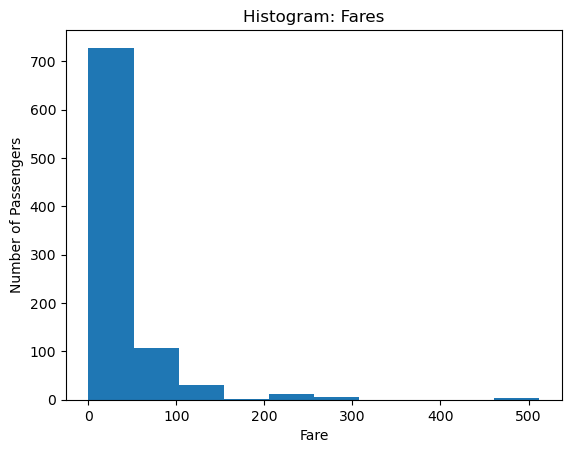

Mean: 32.305420180383315
Mode: 8.05
Spread: 49.753970456921394
Tails: 23.2125


In [73]:
# 5th histogram for Variable "Fare"

# Plot the histogram
plt.hist(titanic_data.Fare, bins=10)

# Add a title and labels for the x and y axes
plt.title('Histogram: Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

# Print the values for Mean, Mode and Spread
print('Mean:', np.mean(titanic_data.Fare))
print('Mode:', st.mode(titanic_data.Fare))
print('Spread:', np.std(titanic_data.Fare))

# Print the value for Tails
p25 = np.percentile(titanic_data.Fare, 25)
p75 = np.percentile(titanic_data.Fare, 75)
iqr = p75 - p25
print('Tails:', iqr)

In [42]:
# The high value for tails, and the very small groups of fares above 200 Pounds Sterling
# suggest that there are a few outliers at the upper end of the fare range. However,
# when comparing the high fares with the number of relatives on board for those passengers,
# it actually seems to be that these are "family tickets". 

In [43]:
# Create a PMF of passengers by sex 
pmf_females = thinkstats2.Pmf(titanic_data[titanic_data['Sex'] == 'female'].Survived)
pmf_males = thinkstats2.Pmf(titanic_data[titanic_data['Sex'] == 'male'].Survived)

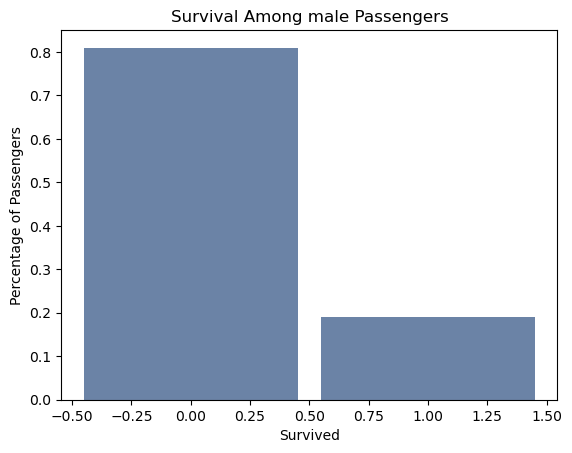

<Figure size 800x600 with 0 Axes>

In [44]:
# Plot the PMF
thinkplot.Hist(pmf_males)
thinkplot.Config(xlabel='Survived',ylabel='Percentage of Passengers', title='Survival Among Male Passengers')
thinkplot.Show(xlabel='Survived')

In [45]:
# As you can see from the PMF above, the probability of a male passenger to survive is less than 20%

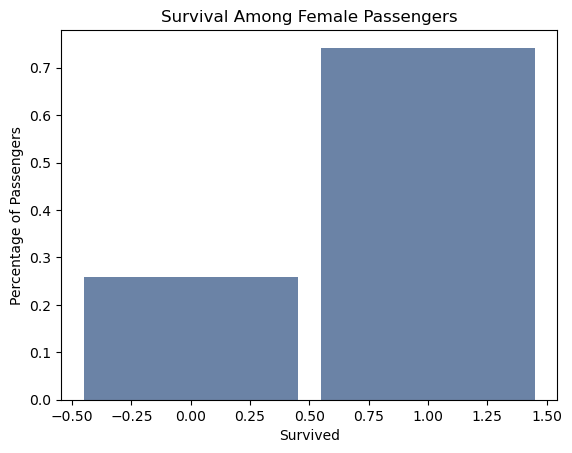

<Figure size 800x600 with 0 Axes>

In [46]:
# Plot the PMF
thinkplot.Hist(pmf_females)
thinkplot.Config(xlabel='Survived',ylabel='Percentage of Passengers', title='Survival Among Female Passengers')
thinkplot.Show(xlabel='Survived')

In [47]:
# The PMF above shows that the probability of a female passenger to survive is over 70%

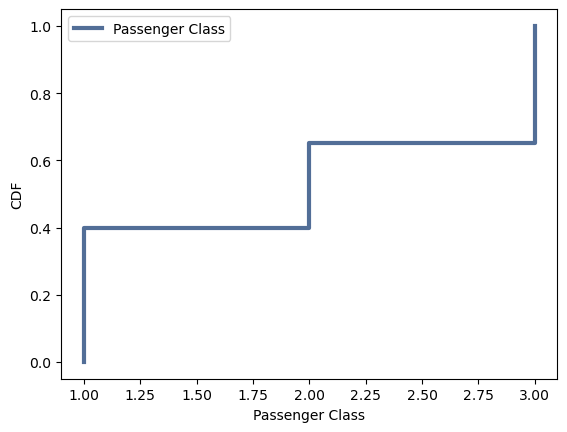

<Figure size 800x600 with 0 Axes>

In [48]:
# Create a CDF for survivors by passenger class
cdf = thinkstats2.Cdf(titanic_data[titanic_data['Survived'] == True].Pclass, label='Passenger Class')

# Plot the CDF
thinkplot.Cdf(cdf)

# Set the labels for the x-axis and y-axis of the plot
thinkplot.Show(xlabel='Passenger Class', ylabel='CDF')

In [49]:
# As you can see from the CDF above, of the survivors 40% were from the first class, 25%
# were from the second class and the remainder of 35% were from the third class.

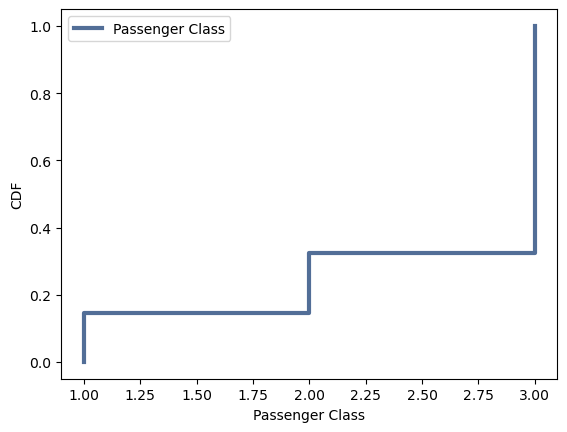

<Figure size 800x600 with 0 Axes>

In [50]:
# Create a CDF for causualities by passenger class
cdf = thinkstats2.Cdf(titanic_data[titanic_data['Survived'] == False].Pclass, label='Passenger Class')

# Plot the CDF
thinkplot.Cdf(cdf)

# Set the labels for the x-axis and y-axis of the plot
thinkplot.Show(xlabel='Passenger Class', ylabel='CDF')

In [51]:
# The CDF above shows that of the causualities 15% were from the first class, 20%
# were from the second class and the remainder of 65% were from the third class.

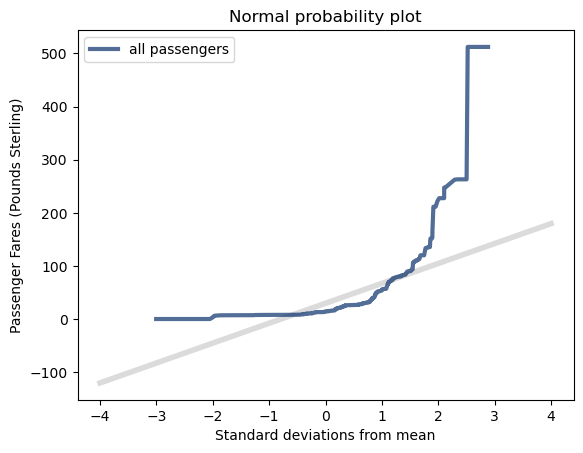

In [52]:
# Create a Normal Probability Plot

# Estimate parameters: trimming outliers yields a better fit
fares = titanic_data.Fare
mean, var = thinkstats2.TrimmedMeanVar(fares, p=0.01)
std = np.sqrt(var)

# Plot the line
xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

# Plot the probability curve
xs, ys = thinkstats2.NormalProbability(fares)
thinkplot.Plot(xs, ys, label="all passengers")

# Output the entire plot with labels
thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Passenger Fares (Pounds Sterling)",
)

# The plot below shows that the fares paid by Titanic's passengers is not
# normally distributed. Since the vast majority of the passengers were
# second and third class, the fares paid by the first class passengers
# deviates the strongest from the mean.

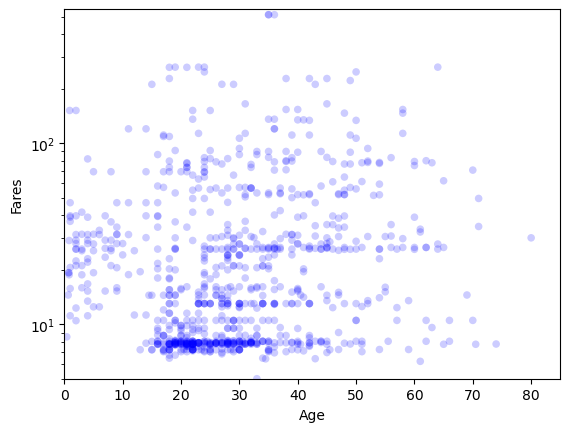

<Figure size 800x600 with 0 Axes>

In [53]:
# Scatter plot for fares by age

# Extract 'Age' and 'Fare' columns from the Titanic data
age, fares = titanic_data.Age, titanic_data.Fare

# Create scatter plot using the 'Age' and 'Fare' variables
thinkplot.Scatter(age, fares)

# Set the labels and axis limits for the plot
thinkplot.Show(xlabel='Age',
ylabel='Fares', yscale = 'log',
axis=[0, 85, 5, 550])

# The majority of low fare passengers seem to be in the age group between
# 20 and 40 while older passengers are represented in higher numbers
# and the upper price ranges.

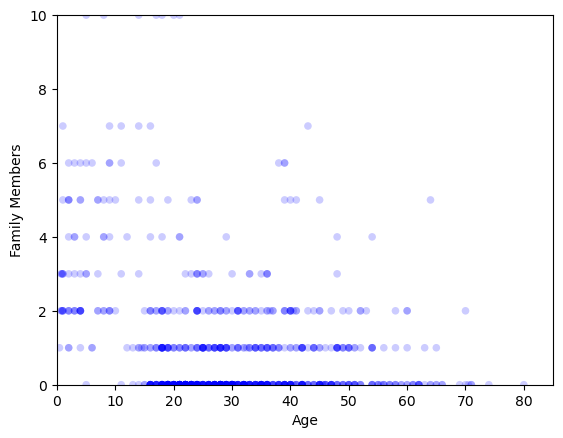

<Figure size 800x600 with 0 Axes>

In [54]:
# Scatter plot for passengers with family members on board by age

# Extract 'Age' and calculate total 'Family Members'
age, fmembers = titanic_data.Age, titanic_data.Siblings_Spouses + titanic_data.Parents_Children

# Create scatter plot using the 'Age' and 'Family Members' variables
thinkplot.Scatter(age, fmembers)

# Set the labels and axis limits for the plot
thinkplot.Show(xlabel='Age',
ylabel='Family Members',
axis=[0, 85, 0, 10])

# One thing is that most passengers ranging from 10 to 65 mostly seem to have one or no family 
# members on board. Also, among passengers with more than one family member on board, an increasing
# number are off a younger age. The latter suggests that these are passengers traveling with
# their parents, where as older passengers with one or two family members might be traveling
# with children.

In [55]:
# Perform a chi-square test on Titanic dataset.

# Identify variables for analysis
dependent_var = 'Survived'  # Dependent variable
independent_var = 'Pclass'  # Independent variable

In [56]:
# Create a contingency table
contingency_table = pd.crosstab(titanic_data[dependent_var], titanic_data[independent_var])

In [57]:
# Calculate the chi-square statistic
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Determine degrees of freedom
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

In [58]:
# Set the significance level
alpha = 0.05

In [59]:
# Conduct the chi-square test
if p_value < alpha:
    print("There is a significant association between", dependent_var, "and", independent_var)
else:
    print("There is no significant association between", dependent_var, "and", independent_var)

There is a significant association between Survived and Pclass


In [60]:
# As the chi-square test shows above, there is a significant association between the 'Survived' variable 
# (dependent variable) and the 'Pclass' variable (independent variable) based on the above chi-square test results.

In [62]:
# Setting up model for individual predictions

# Reading the original data
titanic_data2 = pd.read_csv("titanic.csv")
titanic_data2.drop(['Name','Siblings_Spouses','Parents_Children'],axis=1)

# Setting up the formula and then fitting a multi-nominal regression model
formula='Survived ~ Sex + Pclass + Age'
model = smf.mnlogit(formula, data=titanic_data2)

results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.451867
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               Survived   No. Observations:                  887
Model:                        MNLogit   Df Residuals:                      883
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 May 2023   Pseudo R-squ.:                  0.3223
Time:                        19:24:00   Log-Likelihood:                -400.81
converged:                       True   LL-Null:                       -591.38
Covariance Type:            nonrobust   LLR p-value:                 2.669e-82
===============================================================================
 Survived=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8785      0.463     10.526      0.000       3.970       5.787
Sex[T.male]    -2.5892      0.187    -13.851      0.000      -2.956      -2.223
Pclass         -1.2305      0.125     -9.848      0.000      -1.475      -0.986
Age            -0.0344      0.007     -4.816      0.000      -0.048      -0.020
===============================================================================
"""

In [63]:
# Feeding the data and predicting the probability of the individual survivol statuses

In [64]:
# Predict survivability for a 25-year-old, male, third class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['male', 3, 25]], columns=columns)
results.predict(new)

,0,1
0,0.905621,0.094379


In [65]:
# Predict survivability for a 25-year-old, female, third class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['female', 3, 25]], columns=columns)
results.predict(new)

,0,1
0,0.418761,0.581239


In [66]:
# Predict survivability for a 25-year-old, male, second class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['male', 2, 25]], columns=columns)
results.predict(new)

,0,1
0,0.737064,0.262936


In [45]:
# Predict survivability for a 25-year-old, female, second class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['female', 2, 25]], columns=columns)
results.predict(new)

,0,1
0,0.173876,0.826124


In [67]:
# Predict survivability for a 25-year-old, male, first class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['male', 1, 25]], columns=columns)
results.predict(new)

,0,1
0,0.450222,0.549778


In [68]:
# Predict survivability for a 25-year-old, female, first class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['female', 1, 25]], columns=columns)
results.predict(new)

,0,1
0,0.057925,0.942075


In [48]:
# Predict survivability for a 50-year-old, male, first class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['male', 1, 50]], columns=columns)
results.predict(new)

,0,1
0,0.659095,0.340905


In [69]:
# Predict survivability for a 50-year-old, female, first class
columns = ['Sex', 'Pclass', 'Age']
new = pd.DataFrame([['female', 1, 50]], columns=columns)
results.predict(new)

,0,1
0,0.126761,0.873239


In [70]:
# As shown above, males had a dramatically lower survivability than females.
# From 55% vs. 95% in first class to 9% vs. 37% in third class. In addition
# to the sex, another significant factor was passenger class with females
# having survival chance of slightly over 1/3 in third class, a little over
# half in second class and nearly 95% in first class. Males had a chance of
# survival of less than 1/10 in third class, slightly more than one quarter
# than second class, and a little more than 1/3 in first class. Finally, the
# last significant factor was age, where the chance of dying doubled for both 
# males and females when comparing ages of 25 and 50.

# In conclusion, in any class the main determining factor of survival on the 
# Titanic was whether or not you were female, the secondary factor was the
# passenger class and the final factor was age.

In [71]:
# Run a linear regression analysis

# Define the formula for the linear regression model
formula='Survived ~ Sex + Pclass + Age'

# Fit the linear regression model using the formula and the Titanic data
model = smf.ols(formula=formula, data=titanic_data2).fit()

# Print the summary of the model
print(model.summary())

# Print the parameters of the model
print('\nParams\n')
print(model.params)

# Print the R-squared value of the model
print('\nRSquared\n')
print(model.rsquared)

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 30 May 2023   Prob (F-statistic):           3.19e-92
Time:                        19:24:12   Log-Likelihood:                -405.58
No. Observations:                 887   AIC:                             819.2
Df Residuals:                     883   BIC:                             838.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2947      0.058     22.136      

In [72]:
# Analysis: As the predictions already showed the strongest correlation was in the
# Sex value, suggesting that it will be the best explanatory value to use for the 
# predictions.